In [2]:
#Matthew Ewert
#801232199
#Homework 1
import pandas as pd

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

data = pd.read_csv(url)

print(data.head())

X1 = data.iloc[:, 0]
X2 = data.iloc[:, 1]
X3 = data.iloc[:, 2]
Y = data.iloc[:, 3]
#reading data

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#grad descent function
def gradient_descent(X, Y, alpha, iterations):
    m = len(Y)
    theta0 = 0
    theta1 = 0
    loss_history = []

    for i in range(iterations):
        h = theta0 + theta1 * X
        error = h - Y  # error (prediction - ground truth)
        loss = (1 / (2 * m)) * np.sum(error ** 2)  # avg squared error
        loss_history.append(loss)  # loss at each iteration

        theta0 = theta0 - alpha * (1 / m) * np.sum(error)
        theta1 = theta1 - alpha * (1 / m) * np.sum(error * X)

    return theta0, theta1, loss_history

# usage for X1
theta0_X1, theta1_X1, loss_X1 = gradient_descent(X1, Y, alpha=0.05, iterations=1000)


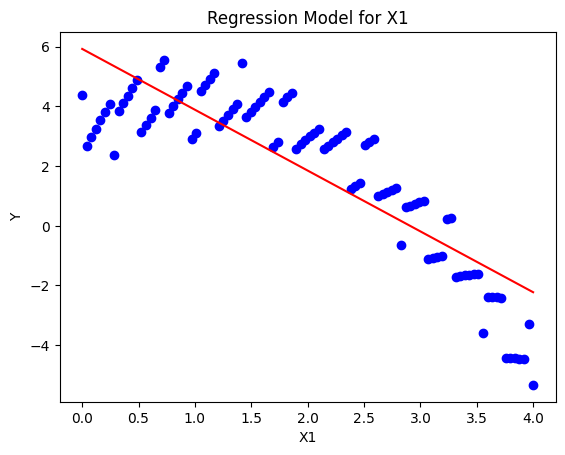

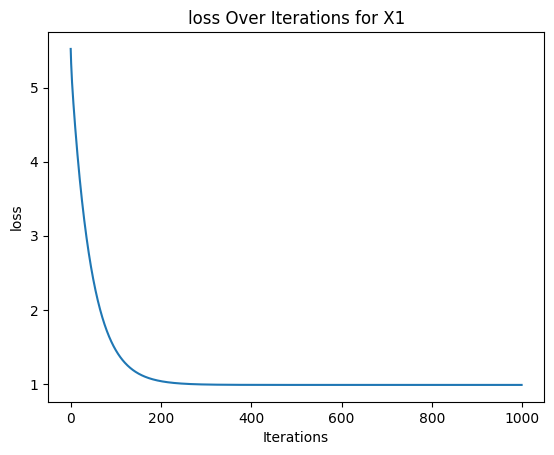

In [4]:
# regression model for X1
plt.scatter(X1, Y, color='blue')
plt.plot(X1, theta0_X1 + theta1_X1 * X1, color='red')
plt.title('Regression Model for X1')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

# loss over iterations
plt.plot(loss_X1)
plt.title('loss Over Iterations for X1')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()


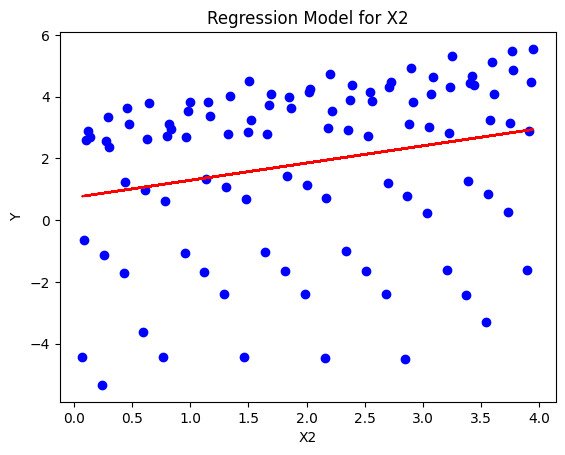

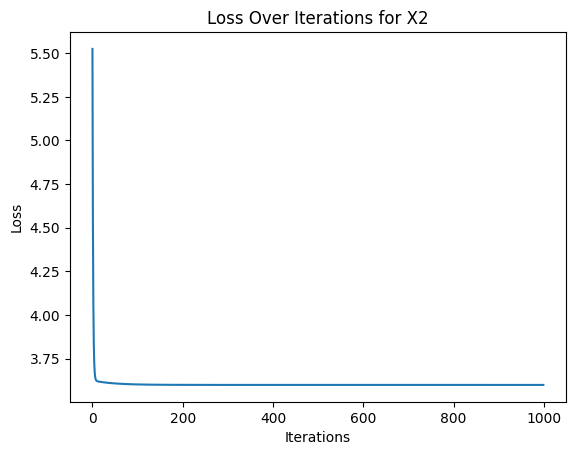

In [11]:
# descent for X2
theta0_X2, theta1_X2, loss_X2 = gradient_descent(X2, Y, alpha=0.05, iterations=1000)

# Plotting the regression model for X2
plt.scatter(X2, Y, color='blue')
plt.plot(X2, theta0_X2 + theta1_X2 * X2, color='red')
plt.title('Regression Model for X2')
plt.xlabel('X2')
plt.ylabel('Y')
plt.show()

# Plotting the cost over iterations for X2
plt.plot(loss_X2)
plt.title('Loss Over Iterations for X2')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


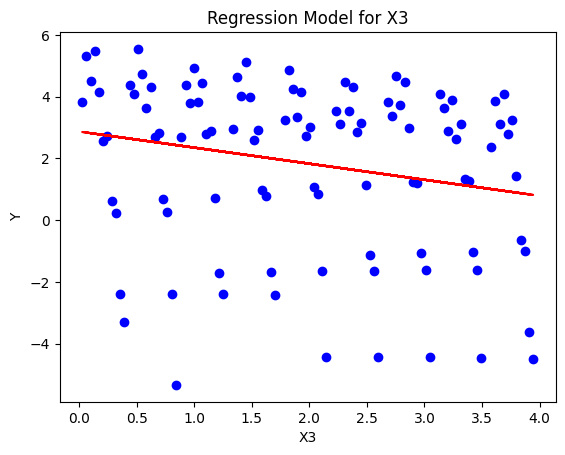

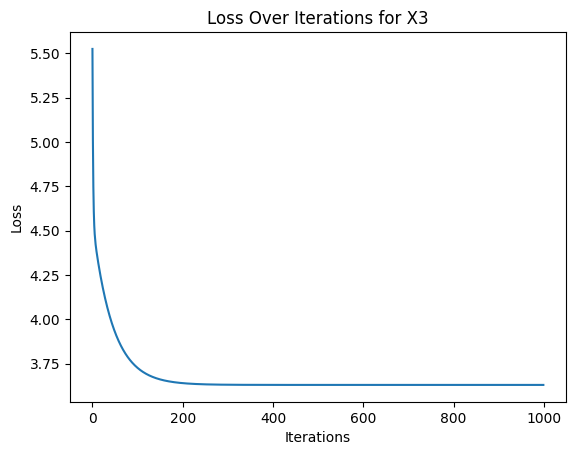

In [10]:
#gradient descent for X3
theta0_X3, theta1_X3, loss_X3 = gradient_descent(X3, Y, alpha=0.05, iterations=1000)

# Plotting
plt.scatter(X3, Y, color='blue')
plt.plot(X3, theta0_X3 + theta1_X3 * X3, color='red')
plt.title('Regression Model for X3')
plt.xlabel('X3')
plt.ylabel('Y')
plt.show()

# Plotting the loss
plt.plot(loss_X3)
plt.title('Loss Over Iterations for X3')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [14]:
import numpy as np

# Multivariable linear regression
def gradient_descent_multi(X, Y, alpha, iterations):
    m = len(Y)
    theta = np.zeros(X.shape[1])
    loss_history = []

    for i in range(iterations):
        h = X.dot(theta)
        error = h - Y  # Error (prediction - ground truth)
        loss = (1 / (2 * m)) * np.sum(error ** 2)  # Mean squared error
        loss_history.append(loss)  # loss at each iteration

        # Gradient descent
        theta = theta - (alpha / m) * X.T.dot(error)

    return theta, loss_history

X = np.column_stack((np.ones(X1.shape[0]), X1, X2, X3))

theta, loss_multi = gradient_descent_multi(X, Y, alpha=0.05, iterations=1000)


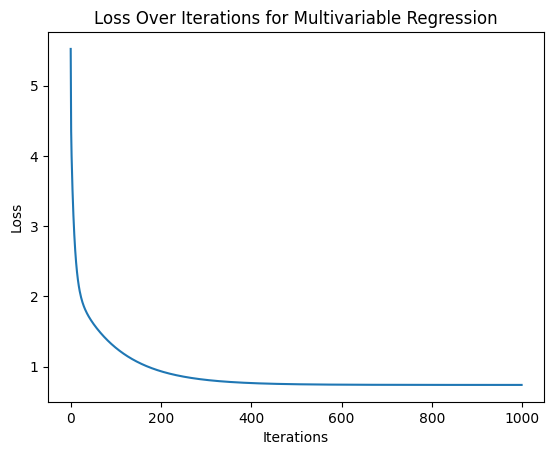

In [26]:
plt.plot(loss_multi)
plt.title('Loss Over Iterations for Multivariable Regression')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()



In [16]:
# final linear regression model where our theta optimized theta coefficients multiply their following variable
print(f"Final model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3")


Final model: Y = 5.279070192007327 + -1.9987612394604615 * X1 + 0.5383628948537201 * X2 + -0.26045736149308607 * X3


In [21]:
#  predicted values of Y
def predict(X, theta):
    return X.dot(theta)

# new value predictions
new_X = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predictions = predict(new_X, theta)
print(predictions)


[3.55821449 0.23971827 0.0990549 ]


In [22]:
# new array to represent new data points we want to predict
X_new = np.array([[1, 1, 1, 1],
                  [1, 2, 0, 4],
                  [1, 3, 2, 1]])

#  make predictions based on opyimized theta values
def predict(X_new, theta):
    return X_new.dot(theta)

# predict
predictions = predict(X_new, theta)
print(f"Predictions for the new data points: {predictions}")


Predictions for the new data points: [3.55821449 0.23971827 0.0990549 ]


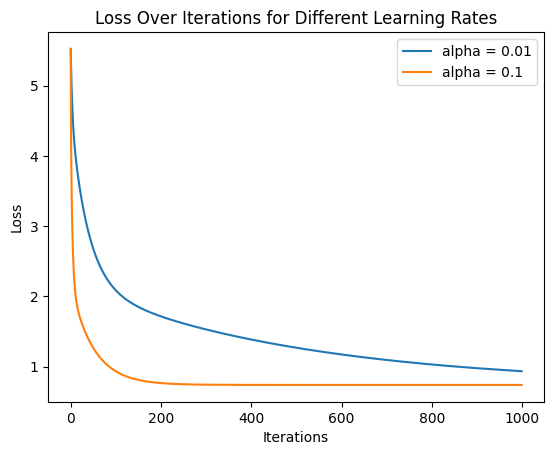

In [24]:
# different learning rate
theta_01, loss_multi_01 = gradient_descent_multi(X, Y, alpha=0.01, iterations=1000)
theta_1, loss_multi_1 = gradient_descent_multi(X, Y, alpha=0.1, iterations=1000)

# Plotting different learning rates
plt.plot(loss_multi_01, label='alpha = 0.01')
plt.plot(loss_multi_1, label='alpha = 0.1')
plt.title('Loss Over Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
# gradient descent for X1
theta0_X1, theta1_X1, loss_X1 = gradient_descent(X1, Y, alpha=0.05, iterations=1000)

# gradient descent for X2
theta0_X2, theta1_X2, loss_X2 = gradient_descent(X2, Y, alpha=0.05, iterations=1000)

# gradient descent for X3
theta0_X3, theta1_X3, loss_X3 = gradient_descent(X3, Y, alpha=0.05, iterations=1000)

# final losses
print(f"Final loss for X1: {loss_X1[-1]}")
print(f"Final loss for X2: {loss_X2[-1]}")
print(f"Final loss for X3: {loss_X3[-1]}")

# which one has the lowest loss
if loss_X1[-1] < loss_X2[-1] and loss_X1[-1] < loss_X3[-1]:
    print("X1 has the lowest loss")
elif loss_X2[-1] < loss_X1[-1] and loss_X2[-1] < loss_X3[-1]:
    print("X2 has the lowest loss")
else:
    print("X3 has the lowest loss")


Final loss for X1: 0.9849930834751573
Final loss for X2: 3.59936601817362
Final loss for X3: 3.629451124750566
X1 has the lowest loss
